In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Akhil\Desktop\data analytics\New folder\housing[1].csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Linear Regression on Median Income

In [8]:
groupby=df.groupby("housing_median_age")["median_income"].mean().reset_index()
groupby

,housing_median_age,median_income
0,1.0,4.003400
1,2.0,5.167766
2,3.0,5.460258
3,4.0,5.180673
4,5.0,4.697636
5,6.0,4.383393
6,7.0,4.464457
7,8.0,4.459338
8,9.0,4.316425
9,10.0,4.050508


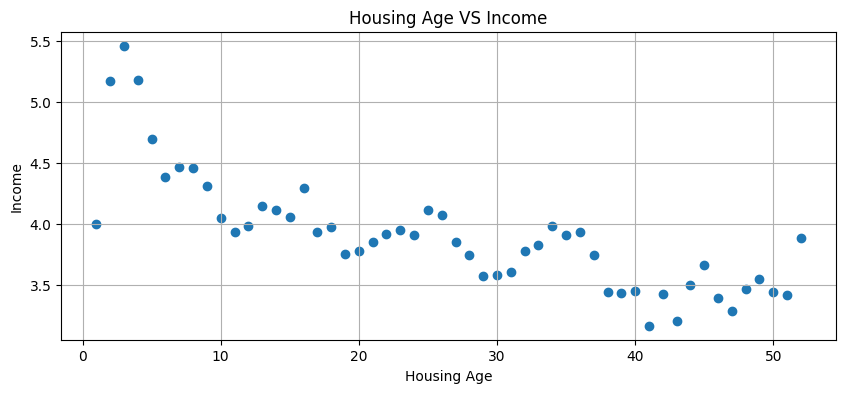

In [13]:
plt.figure(figsize=(10,4))
plt.scatter(groupby["housing_median_age"],groupby["median_income"])
plt.title("Housing Age VS Income")
plt.xlabel("Housing Age")
plt.ylabel("Income")
plt.grid()
plt.show()

Coefficient of x is m=[-0.03]
Intercept of y is c=4.58
If House Age is 60 then median income is [3.06631321]
R2 Score is 0.64
Adjusted R2 score is 0.64


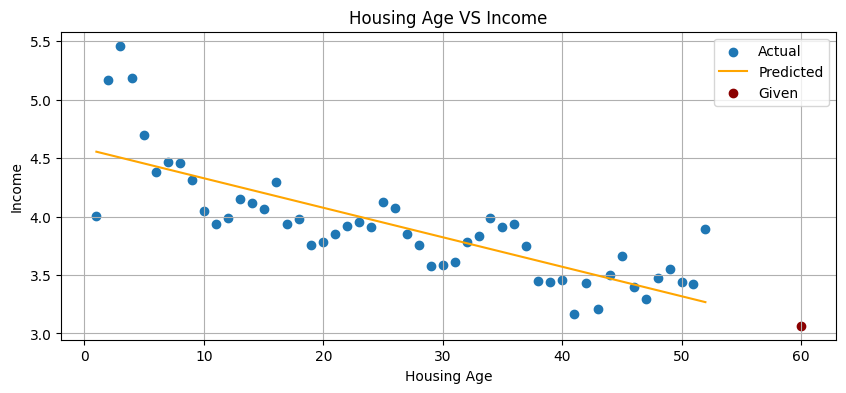

In [34]:
model = LinearRegression()

x= groupby.drop("median_income",axis=1)
y= groupby["median_income"]

model.fit(x,y)
m=model.coef_
c=model.intercept_

print(f"Coefficient of x is m={np.round(m,2)}")
print(f"Intercept of y is c={np.round(c,2)}")

house_age=60
income= m * house_age + c

print(f"If House Age is {house_age} then median income is {income}")

y_pred= model.predict(x)

r2= r2_score(y,y_pred)

print(f"R2 Score is {np.round(r2,2)}")

n=len(x)
k=1
adj_r2= 1-((1-r2) * (n-1)) / (n-k-1)

print(f"Adjusted R2 score is {np.round(adj_r2,2)}")

plt.figure(figsize=(10,4))
plt.scatter(groupby["housing_median_age"],groupby["median_income"],label="Actual")
plt.plot(groupby["housing_median_age"],y_pred,color="orange",label="Predicted")
plt.scatter(house_age,income,color="darkred",label="Given")
plt.title("Housing Age VS Income")
plt.xlabel("Housing Age")
plt.ylabel("Income")
plt.legend()
plt.grid()
plt.show()

* Coefficient of x is m=-0.03
* Intercept of y is c=4.58
* If House Age is 60 then median income is [3.06631321]
* R2 Score is 0.64
* Adjusted R2 score is 0.64

# Linear Regression on Median House Value

Coefficient of x is m=[501.78]
Intercept of y is c=190527.75
R2 Score is 0.17
Adjusted R2 score is 0.15
If House Age is 60 then median value is [220634.32063691]


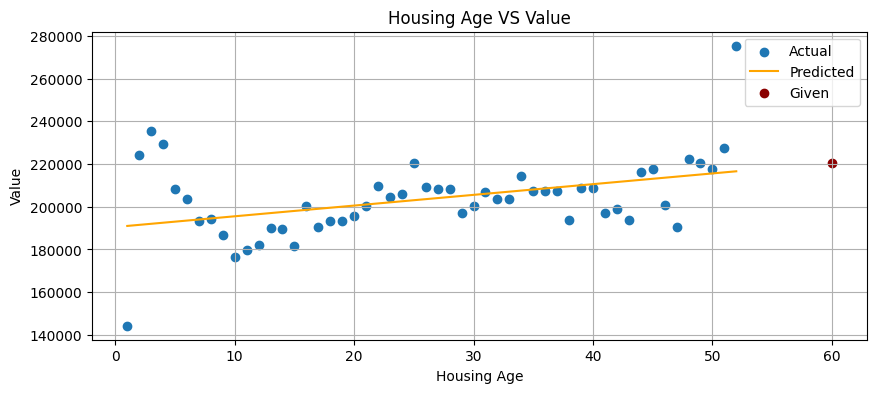

In [39]:
groupby2=df.groupby("housing_median_age")["median_house_value"].mean().reset_index()

model2 = LinearRegression()

x= groupby2.drop("median_house_value",axis=1)
y= groupby2["median_house_value"]

model2.fit(x,y)

m= model2.coef_
c= model2.intercept_
y_pred= model2.predict(x)
r2= r2_score(y,y_pred)

n=len(x)
k=1
adj_r2=1-((1-r2) * (n-1)) / (n-k-1)

house_age=60
value= m * house_age + c

print(f"Coefficient of x is m={np.round(m,2)}")
print(f"Intercept of y is c={np.round(c,2)}")
print(f"R2 Score is {np.round(r2,2)}")
print(f"Adjusted R2 score is {np.round(adj_r2,2)}")
print(f"If House Age is {house_age} then median value is {value}")

plt.figure(figsize=(10,4))
plt.scatter(groupby2["housing_median_age"],groupby2["median_house_value"],label="Actual")
plt.plot(groupby2["housing_median_age"],y_pred,color="orange",label="Predicted")
plt.scatter(house_age,value,color="darkred",label="Given")
plt.title("Housing Age VS Value")
plt.xlabel("Housing Age")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

* Coefficient of x is m=[501.78]
* Intercept of y is c=190527.75
* R2 Score is 0.17
* Adjusted R2 score is 0.15
* If House Age is 60 then median value is [220634.32063691]